<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula09b_kmeans_as_fs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from sklearn.datasets import fetch_covtype
X, y = fetch_covtype(return_X_y=True)
X.shape, y.shape

((581012, 54), (581012,))

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeClassifier
from pprint import pprint

model = RidgeClassifier()
scores = cross_validate(model, X, y)
pprint(scores['test_score'])
print(scores['test_score'].mean())

array([0.58947704, 0.76359474, 0.62652106, 0.67569405, 0.54031772])
0.639120922063683


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), RidgeClassifier())
scores = cross_validate(model, X, y)
pprint(scores['test_score'])
print(scores['test_score'].mean())

array([0.58947704, 0.76360335, 0.62653827, 0.6756252 , 0.5407308 ])
0.6391949311020719


In [73]:
from sklearn.cluster import KMeans

fs = KMeans()
Xnew = fs.fit_transform(X)
Xnew.shape

(581012, 8)

In [74]:
model = make_pipeline(StandardScaler(), KMeans(), RidgeClassifier())
scores = cross_validate(model, X, y)
pprint(scores['test_score'])
print(scores['test_score'].mean())

array([0.53787768, 0.60374517, 0.50885527, 0.58696064, 0.51257293])
0.5500023379582973


In [80]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [85]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [86]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

In [94]:
784*0.2

156.8

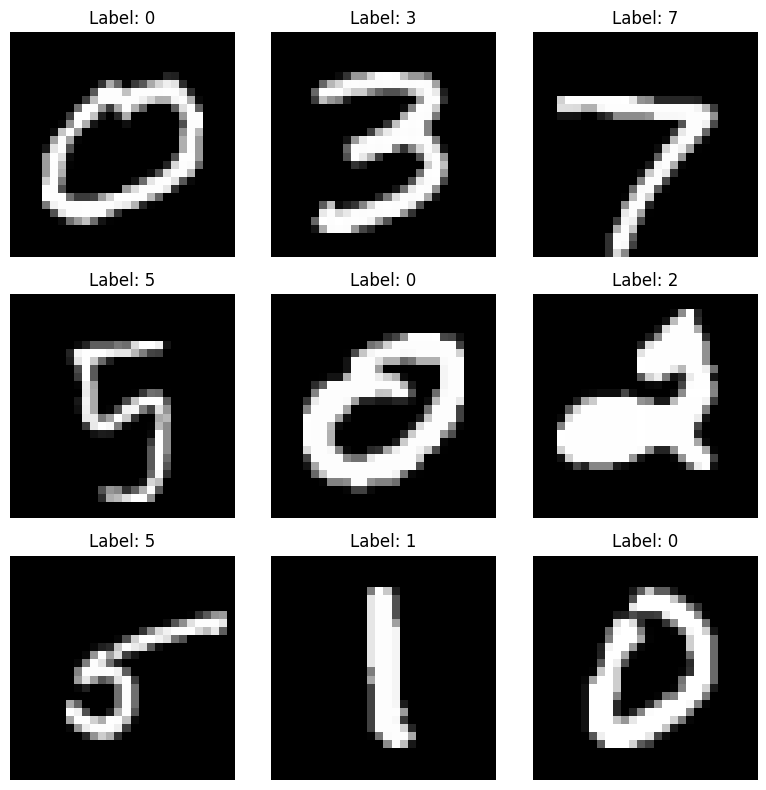

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Select 9 random indices
random_indices = np.random.choice(X_train.shape[0], 9, replace=False)

# Plot the images
plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [88]:
model = RidgeClassifier()
scores = cross_validate(model, X_train_flat, y_train)
pprint(scores['test_score'])
print(scores['test_score'].mean())

array([0.855     , 0.84158333, 0.84125   , 0.8435    , 0.86258333])
0.8487833333333334


In [90]:
model = make_pipeline(StandardScaler(), RidgeClassifier())
scores = cross_validate(model, X_train_flat, y_train)
pprint(scores['test_score'])
print(scores['test_score'].mean())

array([0.855     , 0.84158333, 0.84125   , 0.8435    , 0.86275   ])
0.8488166666666667


In [95]:
model = make_pipeline(KMeans(n_clusters=160), RidgeClassifier())
scores = cross_validate(model, X_train_flat, y_train)
pprint(scores['test_score'])
print(scores['test_score'].mean())

array([0.92933333, 0.92216667, 0.9215    , 0.922     , 0.93175   ])
0.9253500000000001
